In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/goodbooks-10k/sample_book.xml
/kaggle/input/goodbooks-10k/tags.csv
/kaggle/input/goodbooks-10k/to_read.csv
/kaggle/input/goodbooks-10k/books.csv
/kaggle/input/goodbooks-10k/book_tags.csv
/kaggle/input/goodbooks-10k/ratings.csv


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [37]:
books=pd.read_csv('../input/goodbooks-10k/books.csv')
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [38]:
ratings=pd.read_csv('../input/goodbooks-10k/ratings.csv')
ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [39]:
ratings.shape

(981756, 3)

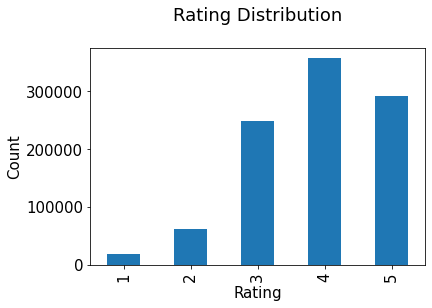

In [40]:
plt.rc("font" ,size=15)
ratings.rating.value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [41]:
rating_count=pd.DataFrame(ratings.groupby('book_id')['rating'].count())
rating_count.sort_values('rating',ascending=False).head()

,rating
book_id,
1,100
5198,100
5215,100
5214,100
9803,100


In [42]:
most_rated_books=pd.DataFrame([1,5198,5215,5214,9803],index=np.arange(5),columns=['book_id'])
most_rated_books

,book_id
0,1
1,5198
2,5215
3,5214
4,9803


In [43]:
most_rated_books_summary=pd.merge(most_rated_books,books , on='book_id')


In [44]:
most_rated_books_summary

,book_id,id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,27,1,41335427,275,439785960,9.780440e+12,"J.K. Rowling, Mary GrandPré",2005.0,Harry Potter and the Half-Blood Prince,...,1678823,1785676,27520,7308,21516,136333,459028,1161491,https://images.gr-assets.com/books/1361039191m...,https://images.gr-assets.com/books/1361039191s...
1,5198,5629,5198,2458248,60,452280397,9.780452e+12,Toni Morrison,1997.0,NaN,...,17524,19079,775,685,1415,4877,6688,5414,https://images.gr-assets.com/books/1327935897m...,https://images.gr-assets.com/books/1327935897s...


In [45]:
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [46]:
columns=['id','book_id','authors','original_title','average_rating','ratings_count']
dataset=books[columns]

In [47]:
dataset.head()

,id,book_id,authors,original_title,average_rating,ratings_count
0,1,2767052,Suzanne Collins,The Hunger Games,4.34,4780653
1,2,3,"J.K. Rowling, Mary GrandPré",Harry Potter and the Philosopher's Stone,4.44,4602479
2,3,41865,Stephenie Meyer,Twilight,3.57,3866839
3,4,2657,Harper Lee,To Kill a Mockingbird,4.25,3198671
4,5,4671,F. Scott Fitzgerald,The Great Gatsby,3.89,2683664


In [48]:
details=pd.DataFrame(books,columns=['book_id','original_title'])
details.head()

,book_id,original_title
0,2767052,The Hunger Games
1,3,Harry Potter and the Philosopher's Stone
2,41865,Twilight
3,2657,To Kill a Mockingbird
4,4671,The Great Gatsby


In [49]:
ratings=pd.merge(details,ratings,on='book_id')
ratings.head()

,book_id,original_title,user_id,rating
0,3,Harry Potter and the Philosopher's Stone,314,3
1,3,Harry Potter and the Philosopher's Stone,588,1
2,3,Harry Potter and the Philosopher's Stone,2077,2
3,3,Harry Potter and the Philosopher's Stone,2487,3
4,3,Harry Potter and the Philosopher's Stone,2900,3


In [53]:
from scipy.sparse import csr_matrix
user_rating=ratings.drop_duplicates(['user_id','original_title'])


In [56]:
user_rating_pivot=user_rating.pivot(index=['original_title'],columns=['user_id'],values='rating').fillna(0.0)
user_ratings_matrix=csr_matrix(user_rating_pivot.values)

In [58]:
user_ratings_pivot.head()

user_id,2,3,4,7,9,10,11,14,15,19,...,53404,53406,53408,53409,53416,53419,53420,53422,53423,53424
original_title,,,,,,,,,,,,,,,,,,,,,
NaN,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Animal Farm & 1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Carter Beats the Devil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Fellowship of the Ring,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
from sklearn.neighbors import NearestNeighbors

model_knn=NearestNeighbors(metric='cosine',algorithm='brute')
model_knn.fit(user_ratings_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [62]:
query_index = np.random.choice(user_ratings_pivot.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(user_ratings_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

21


In [63]:
user_ratings_pivot.index[query_index]

'A History of God: The 4,000-Year Quest of Judaism, Christianity, and Islam'

In [64]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(user_ratings_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, user_ratings_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for A History of God: The 4,000-Year Quest of Judaism, Christianity, and Islam:

1: Fall on Your Knees, with distance of 0.725595881249018:
2: Todos os Nomes, with distance of 0.8926212150815414:
3: Tara Road, with distance of 0.9150459810815705:
4: The Giraffe and the Pelly and Me, with distance of 0.9182863490926998:
5: The Path Between the Seas: The Creation of the Panama Canal, 1870-1914, with distance of 0.9283788575805099:


In [ ]:
print('Coded By Abhijeet')